# PyThorch Model

### Imports

In [1]:
#hide
#Run once per session
!pip install fastai wwf -q --upgrade

In [6]:
from fastai.data.all import *
from fastai.vision.all import *

### Dataloading and Transforming

In [31]:
DATA_PATH = 'clean'
DATA_PATH_X = 'clean/x-data'
DATA_PATH_Y = 'clean/y-data'
CODES_PATH = "clean/codes.txt"
BATCH_SIZE = 4
IMG_SIZE = (128)

In [32]:
x_files = get_image_files(DATA_PATH_X)
y_files = get_image_files(DATA_PATH_Y)

In [33]:
x_files

(#858) [Path('clean/x-data/0.png'),Path('clean/x-data/1.png'),Path('clean/x-data/1008.png'),Path('clean/x-data/1028.png'),Path('clean/x-data/1045.png'),Path('clean/x-data/1049.png'),Path('clean/x-data/1065.png'),Path('clean/x-data/1073.png'),Path('clean/x-data/1087.png'),Path('clean/x-data/1101.png')...]

In [34]:
dblock = DataBlock(
    blocks=(ImageBlock, ImageBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_image_files('y-data'),
    get_x=get_image_files('x-data'),
    item_tfms=Resize(128))

In [35]:
dsets = dblock.datasets(DATA_PATH)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


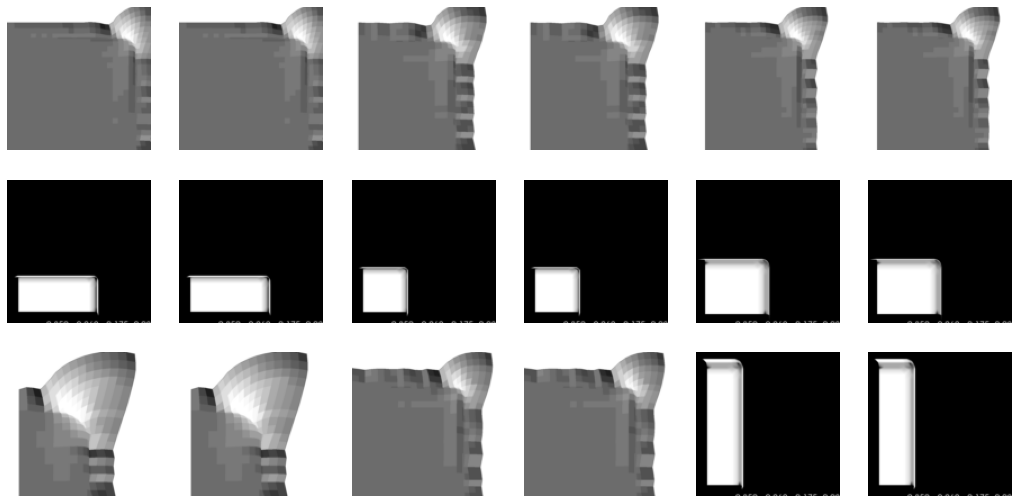

In [36]:
dls = dblock.dataloaders(DATA_PATH)
dls.show_batch()

In [40]:
dls.train_ds[0]

(PILImage mode=RGB size=689x704, PILImage mode=RGB size=689x704)

In [ ]:
path = DATA_PATH_X
fnames = get_image_files(path)
def label_func(x): return DATA_PATH_Y/f'{x.stem}{x.suffix}'
codes = np.loadtxt(CODES_PATH, dtype=str)
    
dls = SegmentationDataLoaders.from_label_func(
                                        path, fnames, label_func, codes=codes,  
                                        valid_pct=0.2, seed=11, bs=BATCH_SIZE, 
                                        batch_tfms=[*aug_transforms(size=IMG_SIZE), 
                                        Normalize.from_stats(*imagenet_stats)])

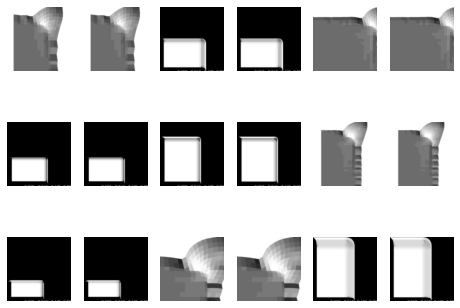

In [41]:
dls.show_batch(max_n=9, figsize=(8,6))

### DL Model

#### Model Creation

In [42]:
opt = ranger
metric = DiceMulti

In [43]:
learn = unet_learner(dls, resnet34, metrics=metric, self_attention=True, act_cls=Mish, opt_func=opt)

AssertionError: `n_out` is not defined, and could not be inferred from data, set `dls.c` or pass `n_out`

In [ ]:
learn.summary()

#### Model training

In [ ]:
learn.lr_find()

In [ ]:
lr = 1e-3

In [ ]:
learn.fit_flat_cos(10, slice(lr))

In [ ]:
learn.save('stage-1')
learn.load('stage-1');

In [ ]:
learn.show_results(max_n=4, figsize=(12,6))

### Model Testing

In [ ]:
TEST_PATH_X = 'test/x-data'
TEST_PATH_Y = 'test/y-data'
TEST_PATHS = (TEST_PATH_X, TEST_PATH_Y) 

In [ ]:
def model_tester(mdl, paths):
    pass